In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel("/content/drive/My Drive/ASM_project/ASM_OPEC_CRUDE_OIL_PRICES.xlsx")

In [4]:
df.head()

,Month,Price
0,1973-10-01,5.89
1,1973-11-01,7.07
2,1973-12-01,8.01
3,1974-01-01,11.94
4,1974-02-01,13.10


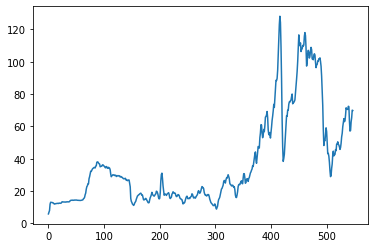

In [5]:
df['Price'].plot()

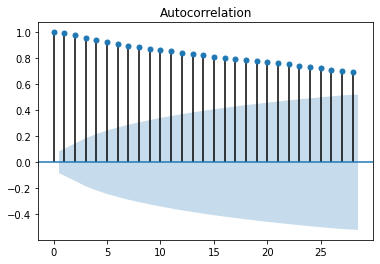

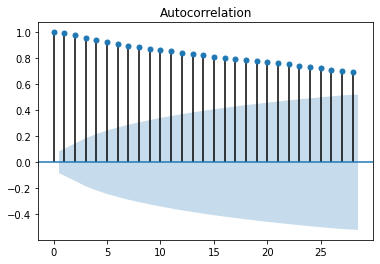

In [6]:
plot_acf(df['Price'])

**Converting series to stationary**

In [7]:
df['Price'].shift(1)

0        NaN
1       5.89
2       7.07
3       8.01
4      11.94
       ...  
543    57.11
544    57.46
545    62.76
546    65.30
547    70.04
Name: Price, Length: 548, dtype: float64

In [8]:
price_diff = df['Price'].diff(periods=1)

In [9]:
price_diff = price_diff[1:]
price_diff.head()

1    1.18
2    0.94
3    3.93
4    1.16
5   -0.06
Name: Price, dtype: float64

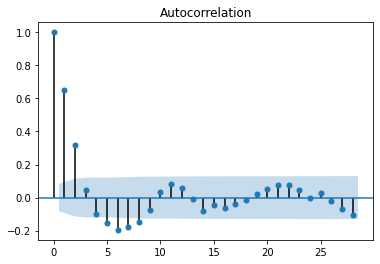

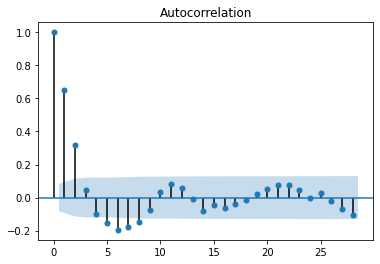

In [10]:
plot_acf(price_diff)

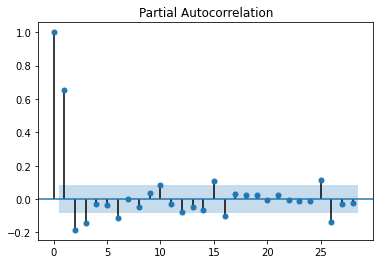

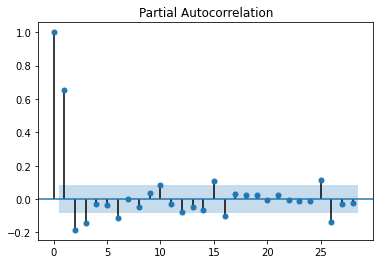

In [11]:
plot_pacf(price_diff)

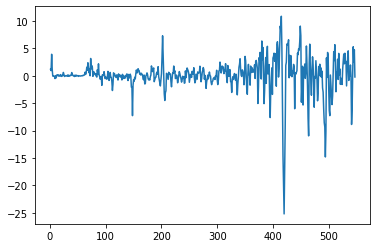

In [12]:
price_diff.plot()

In [13]:
mcn = df['Price']
X= mcn.values
train_size = int(len(X)*0.8)
train = X[:train_size]
test = X[train_size +1 :]
predictions = []

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4, 0, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  438
Model:                     ARMA(4, 1)   Log Likelihood                -872.794
Method:                       css-mle   S.D. of innovations              1.762
Date:                Tue, 10 Nov 2020   AIC                           1759.588
Time:                        05:18:06   BIC                           1788.163
Sample:                             0   HQIC                          1770.863
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3947     13.373      2.422      0.016       6.185      58.605
ar.L1.y        2.3368      0.201     11.611      0.000       1.942       2.731
ar.L2.y       -1.8243      0.401     -4.547      0.0

In [16]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [17]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3859.8099896502054
(0, 0, 1) 3285.4201014383584
(0, 1, 0) 2112.9723861549996
(0, 1, 1) 1881.581824406106
(0, 1, 3) 1771.2450079569073
(0, 1, 4) 1767.9882954715517
(0, 2, 0) 1854.1315776705899
(0, 2, 1) 1854.6854028086836
(0, 2, 2) 1856.406921183022
(0, 2, 3) 1790.0112444110819
(0, 2, 4) 1774.091659226898
(1, 0, 0) 2125.38331002219
(1, 0, 1) 1892.729296889819
(1, 0, 2) 1796.2374534750695
(1, 0, 3) 1779.162228143302
(1, 0, 4) 1774.4303291393535
(1, 1, 0) 1794.824250996653
(1, 1, 1) 1782.3800687315493
(1, 1, 2) 1767.4244380323498
(1, 1, 3) 1768.0693610582537
(1, 2, 0) 1854.6549599668529
(1, 2, 1) 1797.1213535427946
(1, 2, 2) 1784.8601259512625
(1, 2, 3) 1770.033162532765
(1, 2, 4) 1770.6860304111387
(2, 0, 0) 1796.344361285764
(2, 0, 1) 1786.3442791132697
(2, 0, 2) 1772.8800389183955
(2, 0, 3) 1773.7028600995654
(2, 0, 4) 1785.5925217781764
(2, 1, 0) 1773.3641674629991
(2, 1, 1) 1746.13404920525
(2, 1, 2) 1748.0411536320976
(2, 2, 0) 1856.6549018955438
(2, 2, 1) 1776.03549546869

In [19]:
X = price_diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -6.588178
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Reject Ho - Time Series is Stationary
